In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load dataset (update path if needed)
df = pd.read_csv("Data\Data\Data for lab 02.csv")

# Select required columns
df = df[['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)', 'CO2 emissions (g/km)']]

# Drop any missing values
df.dropna(inplace=True)

# Split features (X) and target (y)
X = df[['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)']].values
y = df['CO2 emissions (g/km)'].values.reshape(-1, 1)

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\darsh\AppData\Local\Temp\ipykernel_27664\2639454141.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("Data\Data\Data for lab 02.csv")


In [8]:
# Normalize features for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Initialize parameters
m, n = X_train.shape
theta = np.zeros((n + 1, 1))  # n features + bias term
alpha = 0.001  # Learning rate
iterations = 1000  # Number of iterations

# Add bias column (x0 = 1)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    return (1 / (2 * m)) * np.sum(error ** 2)

# Gradient Descent Loop
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        # Print every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    
    return theta, cost_history

# Train the model
theta_optimal, cost_history = gradient_descent(X_train_bias, y_train, theta, alpha, iterations)


Iteration 0, Cost: 45606.65564158639
Iteration 100, Cost: 37022.57378151318
Iteration 200, Cost: 30150.250895561112
Iteration 300, Cost: 24614.4418559125
Iteration 400, Cost: 20134.95430433957
Iteration 500, Cost: 16498.168960079045
Iteration 600, Cost: 13538.404529057076
Iteration 700, Cost: 11125.393825955292
Iteration 800, Cost: 9155.625688623473
Iteration 900, Cost: 7546.187831762048


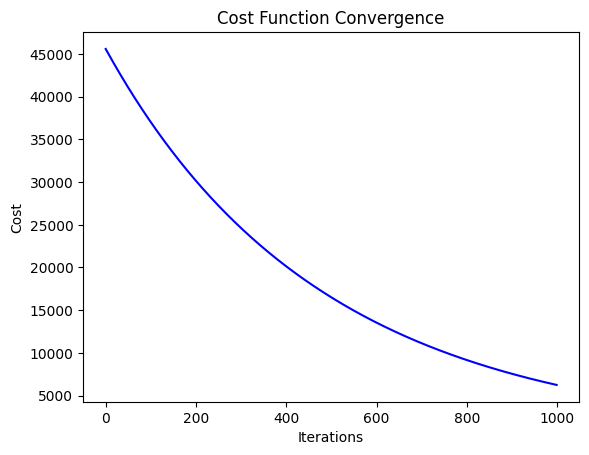

In [10]:
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()


In [11]:
# Predict CO2 Emissions
y_pred_train = X_train_bias.dot(theta_optimal)
y_pred_test = X_test_bias.dot(theta_optimal)

# Compute Performance Metrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 12296.307782021484
R² Score: -2.5033024607132086


In [12]:
# Normal Equation for Optimal Parameters (Linear Algebra Approach)
theta_normal = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)
print(f"Optimal Theta (Normal Equation):\n{theta_normal}")


Optimal Theta (Normal Equation):
[[295.56946183]
 [  2.53577661]
 [ 19.2808868 ]
 [  5.25141534]
 [-39.04834533]]


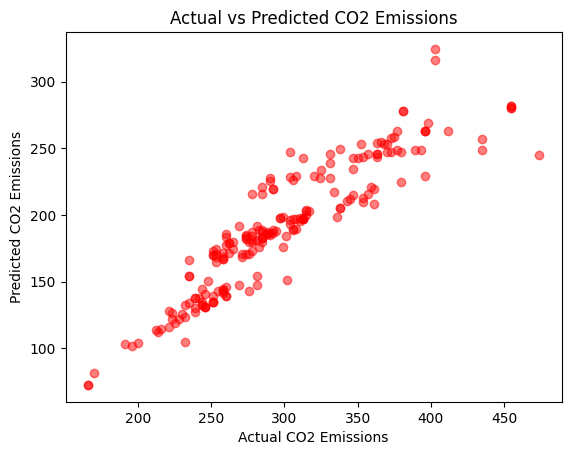

In [13]:
# Plot predictions vs actual values
plt.scatter(y_test, y_pred_test, color='red', alpha=0.5)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()


In [14]:
# New data for prediction
new_data = np.array([
    [2017, 3.2, 6, 22],
    [2018, 1.8, 4, 25],
    [2019, 4.4, 8, 20],
    [2020, 8.3, 10, 11]
])

# Normalize new data
new_data_scaled = scaler.transform(new_data)

# Add bias term
new_data_bias = np.c_[np.ones((new_data_scaled.shape[0], 1)), new_data_scaled]

# Predict using trained model
predictions = new_data_bias.dot(theta_optimal)
print(f"Predicted CO2 Emissions:\n{predictions}")


Predicted CO2 Emissions:
[[183.59909293]
 [132.13215186]
 [226.37816815]
 [339.23617043]]
